In [1]:
import pandas as pd
import numpy as np
import wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('indonesian'))
import matplotlib.pyplot as plt

import seaborn as sns
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/m13518040/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_smsa = './dataset/smsa-document-sentiment/train_preprocess.tsv'
valid_smsa = './dataset/smsa-document-sentiment/valid_preprocess.tsv'
test_smsa = './dataset/smsa-document-sentiment/test_preprocess_masked_label.tsv'

train_emot = './dataset/emot-emotion-twitter/train_preprocess.csv'
valid_emot = './dataset/emot-emotion-twitter/valid_preprocess.csv'
test_emot = './dataset/emot-emotion-twitter/test_preprocess.csv'

## Sentiment

In [3]:
df_sent = pd.read_csv(train_smsa, sep='\t')
df_sent.loc[-1] = ["meski masa kampanye sudah selesai , bukan berati habis pula upaya mengerek tingkat kedipilihan elektabilitas .", "neutral"]  # adding a row
df_sent.index = df_sent.index + 1  # shifting index
df_sent = df_sent.sort_index()  # sorting by index
df_sent.columns = ["text", "label"]
df_sent.head()

,text,label
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


<AxesSubplot:>

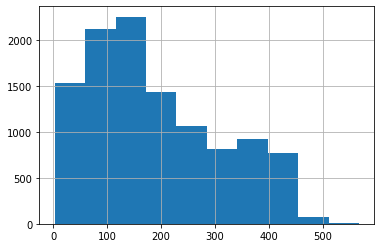

In [4]:
df_sent['text'].str.len().hist()

<AxesSubplot:>

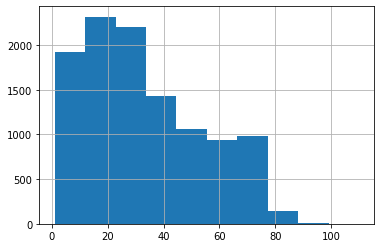

In [5]:
df_sent['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

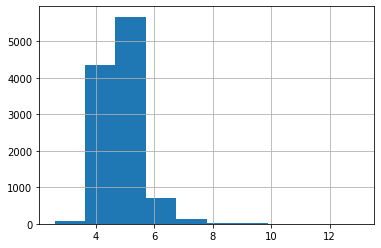

In [6]:
df_sent['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

<BarContainer object of 10 artists>

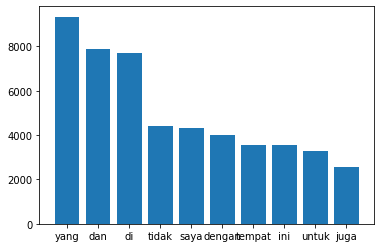

In [7]:
corpus=[]
new= df_sent['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot:>

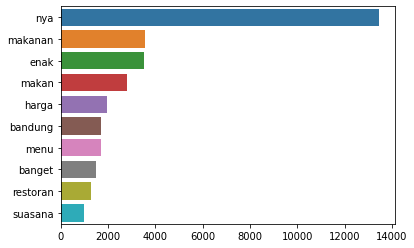

In [8]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop and word.isalpha()):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

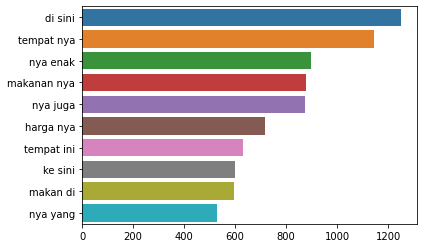

In [9]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_bi_grams=get_top_ngram(df_sent['text'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

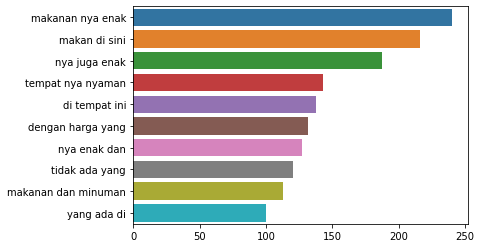

In [10]:
top_tri_grams=get_top_ngram(df_sent['text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

## Emotion

In [11]:
df_emot = pd.read_csv(valid_emot)
df_emot.columns = ["label", "text"]
df_emot.head()

,label,text
0,anger,[USERNAME] jaringannya mati ya? Tidak bisa dib...
1,anger,It's like a circle of stupidity. Atlit gak diu...
2,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3,happy,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
4,happy,"Di hari ini, yap tepat di tanggal 23 juli dima..."


<AxesSubplot:>

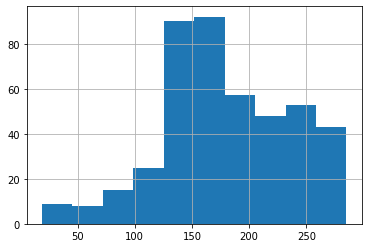

In [12]:
df_emot['text'].str.len().hist()

<AxesSubplot:>

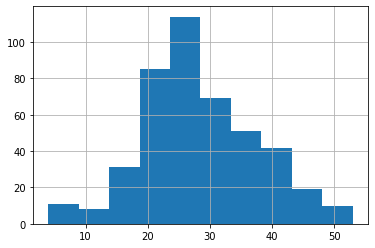

In [13]:
df_emot['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

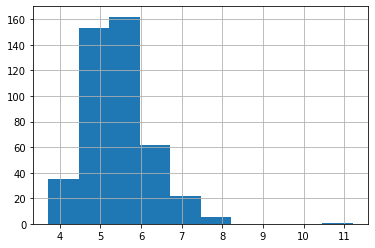

In [14]:
df_emot['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

<BarContainer object of 10 artists>

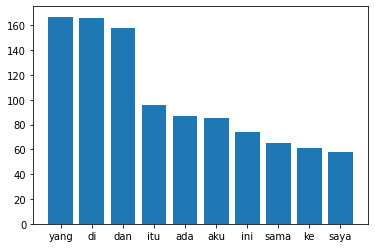

In [15]:
corpus=[]
new= df_emot['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot:>

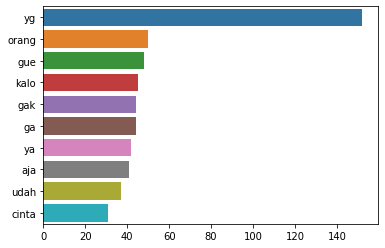

In [16]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop and word.isalpha()):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

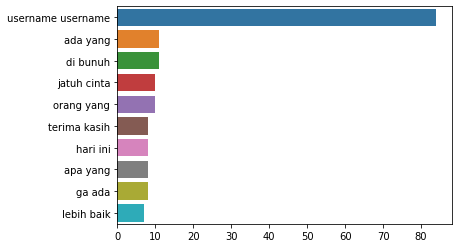

In [17]:
top_bi_grams=get_top_ngram(df_emot['text'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

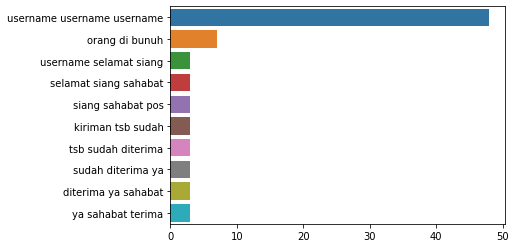

In [18]:
top_tri_grams=get_top_ngram(df_emot['text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)